<a href="https://colab.research.google.com/github/rus4787/Neurocontrol-of-the-quality-of-managers-conversations/blob/main/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BB%D0%B5%D0%B9%D0%B1%D0%BB%D0%BE%D0%B2_%D0%BF%D1%80%D0%BE%D0%BC%D1%82%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка лейблов нового промта на продажи


## Подгрузка данных

In [ ]:
import re
import time
import pandas as pd
import joblib
import os

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# разделитель файла ","

try:
    organization = joblib.load('/content/drive/MyDrive/FIPK/base_data/df_organizations.joblib')
    final_df_2 = joblib.load('/content/drive/MyDrive/FIPK/base_data/final_df_2.joblib')
    schet = joblib.load('/content/drive/MyDrive/FIPK/base_data/df_schet.joblib')
    nomenclatur = joblib.load('/content/drive/MyDrive/FIPK/base_data/data_nomenclatur.joblib')

    df_org = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeofficeorg.joblib')

    print('Файл успешно загружен с сетевого адреса Colab')

except FileNotFoundError:
    try:
        df_org = joblib.load('C:/Users/khabi/Python_project/barnaul/base_work/qq85_stthomeofficeorg.joblib')

        print('Файл успешно загружен с локального адреса')

    except Exception as e:
        print(f'Data upload error {e}')

Файл успешно загружен с сетевого адреса Colab


In [ ]:
SOUT = joblib.load('/content/drive/MyDrive/FIPK/new_data/Реестр СОУТ и деклараций/reestr_org_ohrana_60r.joblib')
declar = joblib.load('/content/drive/MyDrive/barnaul_analitic/focus/focus_01_91/reestr_declar.joblib')

In [ ]:
# import os
# import joblib
# import pandas as pd

# class DataCallProcessor:
#     def __init__(self, output_dir):
#         self.output_dir = output_dir
#         os.makedirs(self.output_dir, exist_ok=True)
#         self.data_call_extended_path = os.path.join(self.output_dir, 'data_call_extended.joblib')

#     def load_existing_data(self):
#         """Load existing data if available."""
#         if os.path.exists(self.data_call_extended_path):
#             return joblib.load(self.data_call_extended_path)
#         return pd.DataFrame()

#     def load_data_from_files(self):
#         """Load data from joblib files."""
#         df_cal = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeoffice_trans.joblib')
#         df_label = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeoffice_label2.joblib')
#         df_label_dict = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeoffice_label2_dict.joblib')
#         return df_cal, df_label, df_label_dict

#     def process_data(self, df_cal, df_label, df_label_dict):
#         """Transform and merge data with labels."""
#         # Основные данные звонков
#         data_call = df_cal[['id', 'user_id', 'org_id', 'log_id', 'zayavka_id', 'created', 'txt1', 'summary', 'label_ver']]
#         data_call = data_call.rename(columns={'txt1': 'text'})
#         data_call = data_call[data_call['label_ver'] == 2].drop(columns=['label_ver']).reset_index(drop=True)
#         data_call['created'] = pd.to_datetime(data_call['created'], unit='s').dt.date
#         data_call['invoice'] = data_call['zayavka_id'].apply(lambda x: 1 if pd.notnull(x) else 0)

#         # Пивот-таблица для меток
#         label_pivot = df_label.pivot_table(index='log_id', columns='label_dict_id', values='label', aggfunc='first').reset_index()
#         label_columns = df_label_dict.set_index('id')['label'].to_dict()
#         label_pivot = label_pivot.rename(columns=label_columns)

#         # Объединение данных звонков с метками
#         return pd.merge(data_call, label_pivot, on='log_id', how='left').fillna(0)

#     def transform_columns(self, df):
#         """Transform specified columns."""
#         def transform_value(value):
#             if value in ['0', 0, '[]', 'null', '{}', 'Нет'] or pd.isna(value):
#                 return 0
#             else:
#                 return 1

#         columns_to_transform = [
#             'Обсуждение программ по антитерроризму',
#             'Обсуждение программ по гражданской обороне',
#             'Обсуждение программ по закупкам',
#             'Обсуждение программ по охране труда',
#             'Обсуждение программ по пожарной безопасности',
#             'Обсуждение программ по экологии',
#             'Обсуждение программ по обращению с отходами',
#             'Обсуждение программ по энергосбережению'
#         ]

#         df[columns_to_transform] = df[columns_to_transform].applymap(transform_value)
#         df = df.loc[:, ~df.columns.duplicated()]
#         return df

#     def update_data_call_extended(self):
#         """Update and save data_call_extended."""
#         df_cal, df_label, df_label_dict = self.load_data_from_files()

#         if not df_cal.empty and not df_label.empty:
#             processed_data = self.process_data(df_cal, df_label, df_label_dict)
#             processed_data = self.transform_columns(processed_data)

#             # Сохранение обработанных данных
#             joblib.dump(processed_data, self.data_call_extended_path)
#             print(f"data_call_extended успешно обновлен и сохранен в {self.data_call_extended_path}.")
#         else:
#             print("Нет данных для обработки.")

In [ ]:
# output_dir = "/content/drive/MyDrive/barnaul_analitic/focus/focus_call/base_call"
# processor = DataCallProcessor(output_dir=output_dir)
# processor.update_data_call_extended()

In [ ]:
data_call_extended = joblib.load('/content/drive/MyDrive/barnaul_analitic/focus/focus_call/base_call/data_call_extended.joblib')

## Определение влияния лейблов разговора на продажу


In [ ]:
df_SOUT = SOUT[['Id', 'Inn', 'OGRN', 'Title',
                'Address', 'продажа', 'org_id',
                'оквэд', 'класс_оквэд', 'клиент']]

In [ ]:
SOUT_filtered = df_SOUT[df_SOUT['org_id'] != 0]
org_ids_to_find_SOUT = SOUT_filtered['org_id'].unique()
df_call_filtered_SOUT = data_call_extended[data_call_extended['org_id'].isin(org_ids_to_find_SOUT)]
df_call_filtered_SOUT.head(1)

,id,user_id,org_id,log_id,zayavka_id,created,text,summary,invoice,Описание анализа,Положительные эмоции клиента (в %),Отрицательные эмоции клиента (в %),Нейтральные эмоции клиента (в %),Интенсивность эмоций клиента (количество восклицательных знаков),Вопросы от клиента,Вопросы от менеджера,Ответы на вопросы,Возражения клиента,Ответы менеджера на возражения,Эффективность преодоления возражений (в %),Средняя длина фраз клиента,Средняя длина фраз менеджера,Максимальная длина фраз,Убеждающие слова клиента,Убеждающие слова менеджера,Отказы клиента,Анализ причин отказов,Причины отказов клиента,Интерес клиента к продуктам,Интерес клиента к продуктам по категориям,"Продукты, предложенные менеджером","Продукты, от которых отказался клиент",Анализ отказов по продуктам,Переходы между темами,Длительность разговора (в минутах),Количество пауз,Повторы в разговоре,Уточняющие вопросы,"Обещания, сделанные менеджером",Извинения в разговоре,Упоминания пакетов,Предложения пакетов,Принятие предложений по пакетам,Причины отказов от пакетов,Короткий разговор (да/нет),Результат короткого разговора (успешный/неуспешный),Общее количество вопросов,Общее количество предложений,Общее количество слов,Количество уникальных слов,Количество убеждающих слов,Формулировки отказа,Принятие пакетов клиентом,Эмоциональный тон клиента,Эмоциональная интенсивность,Оценка вовлеченности клиента и менеджера,Оценка тона и контекста разговора,Рейтинг эффективности разговора,Настойчивость менеджера,Успешность продвижения сделки,Вовлеченность клиента,Экспертиза менеджера,Личный контакт менеджера,Эффективность предложений менеджера,Общая оценка взаимодействия,Коэффициент конверсии,Предложение персональной скидки,Окончательное решение клиента,Клиент покинул разговор (да/нет),Оценка выступления менеджера,Оценка ответа клиента,Рекомендации по улучшению работы менеджера,Обсуждение программ по антитерроризму,Обсуждение программ по гражданской обороне,Обсуждение программ по закупкам,Обсуждение программ по охране труда,Обсуждение программ по пожарной безопасности,Обсуждение программ по экологии,Обсуждение программ по обращению с отходами,Обсуждение программ по энергосбережению,Тип звонка,Стадия цикла продаж,Цель звонка,Влияние на продажи,Общая оценка звонка,Вероятность успешной продажи,Тип стратегии,"Краткое описание или цитата, подтверждающая тип стратегии"
18,347182,6362,6289924.0,16968090.0,0.0,2024-09-20,"2) К соединению установлено. Пожалуйста, подождите.\n1) Виктория Валерьевна, будьте любезны.\n2) Алло. Алло. Слушаю вас.\n1) Это Елена, Федеральный институт повышения квалификации.\n2) Подожди секунду. Нам ничего не нужно, никаких курсов. Спасибо.\n",Клиент отказался от предложения о прохождении курсов. Разговор был коротким и завершился отрицательным ответом.,0,Клиент отказался от предложения о прохождении курсов. Разговор был коротким и завершился отрицательным ответом.,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,"{""financial"": 0, ""temporary"": 0, ""organizational"": 0}",1,"{""package"": 0, ""individual"": 0, ""subscriptions"": 0}",0,0,0,"{""package"": 0}",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Менеджеру рекомендуется более детально выяснять потребности клиента и предлагать более персонализированные решения для увеличения вероятности успешного завершения сделки.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Смотрим по новым лейблам

In [ ]:
data_SOUT = df_call_filtered_SOUT[df_call_filtered_SOUT['Тип стратегии'] != 0]

In [ ]:
data_SOUT['Тип стратегии'].value_counts()

,count
Тип стратегии,
Другое,77
Изменения в законодательстве,55
,43
Изменения в клиентском поле,8
Рекомендации от других компаний,2
null,1


In [ ]:
data_SOUT = df_call_filtered_SOUT[df_call_filtered_SOUT['Тип стратегии'] != 0]
data_SOUT.head(1)

id  user_id     org_id      log_id  zayavka_id     created  \
7916  358287     4086  6198311.0  17193086.0         0.0  2024-10-25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
data_SOUT.to_excel('/content/drive/MyDrive/barnaul_analitic/focus/data_SOUT.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
emotion_columns = [
    'Положительные эмоции клиента (в %)',
    'Отрицательные эмоции клиента (в %)',
    'Нейтральные эмоции клиента (в %)',
    'Интенсивность эмоций клиента (количество восклицательных знаков)',
    'Эффективность преодоления возражений (в %)',
    'Средняя длина фраз клиента',
    'Средняя длина фраз менеджера',
    'Настойчивость менеджера',
    'Успешность продвижения сделки',
    'Вовлеченность клиента',
    'Экспертиза менеджера',
    'Личный контакт менеджера',
    'Эффективность предложений менеджера',
    'Коэффициент конверсии',
    'Вероятность успешной продажи'
]
for col in emotion_columns:
    data_SOUT[col] = pd.to_numeric(data_SOUT[col], errors='coerce')

emotion_stats = data_SOUT[emotion_columns].describe()
emotion_stats

<ipython-input-30-db067e3a49bf>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SOUT[col] = pd.to_numeric(data_SOUT[col], errors='coerce')


,Положительные эмоции клиента (в %),Отрицательные эмоции клиента (в %),Нейтральные эмоции клиента (в %),Интенсивность эмоций клиента (количество восклицательных знаков),Эффективность преодоления возражений (в %),Средняя длина фраз клиента,Средняя длина фраз менеджера,Настойчивость менеджера,Успешность продвижения сделки,Вовлеченность клиента,Экспертиза менеджера,Личный контакт менеджера,Эффективность предложений менеджера,Коэффициент конверсии,Вероятность успешной продажи
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,24.397163,0.780142,74.822695,0.035461,72.836667,7.056738,6.865248,0.439716,0.460993,1.368794,0.893617,0.624113,0.524823,35.106383,35.638298
std,28.893123,4.562412,28.960634,0.251036,38.393954,10.036913,8.273210,0.498122,0.500253,0.759806,0.473620,0.486078,0.501164,43.088232,37.568276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,40.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,0.000000,80.000000,0.000000,100.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,20.000000
75%,60.000000,0.000000,100.000000,0.000000,100.000000,15.000000,12.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,90.000000,80.000000
max,100.000000,50.000000,100.000000,2.000000,100.000000,30.000000,25.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,100.000000,100.000000


Гистограммы

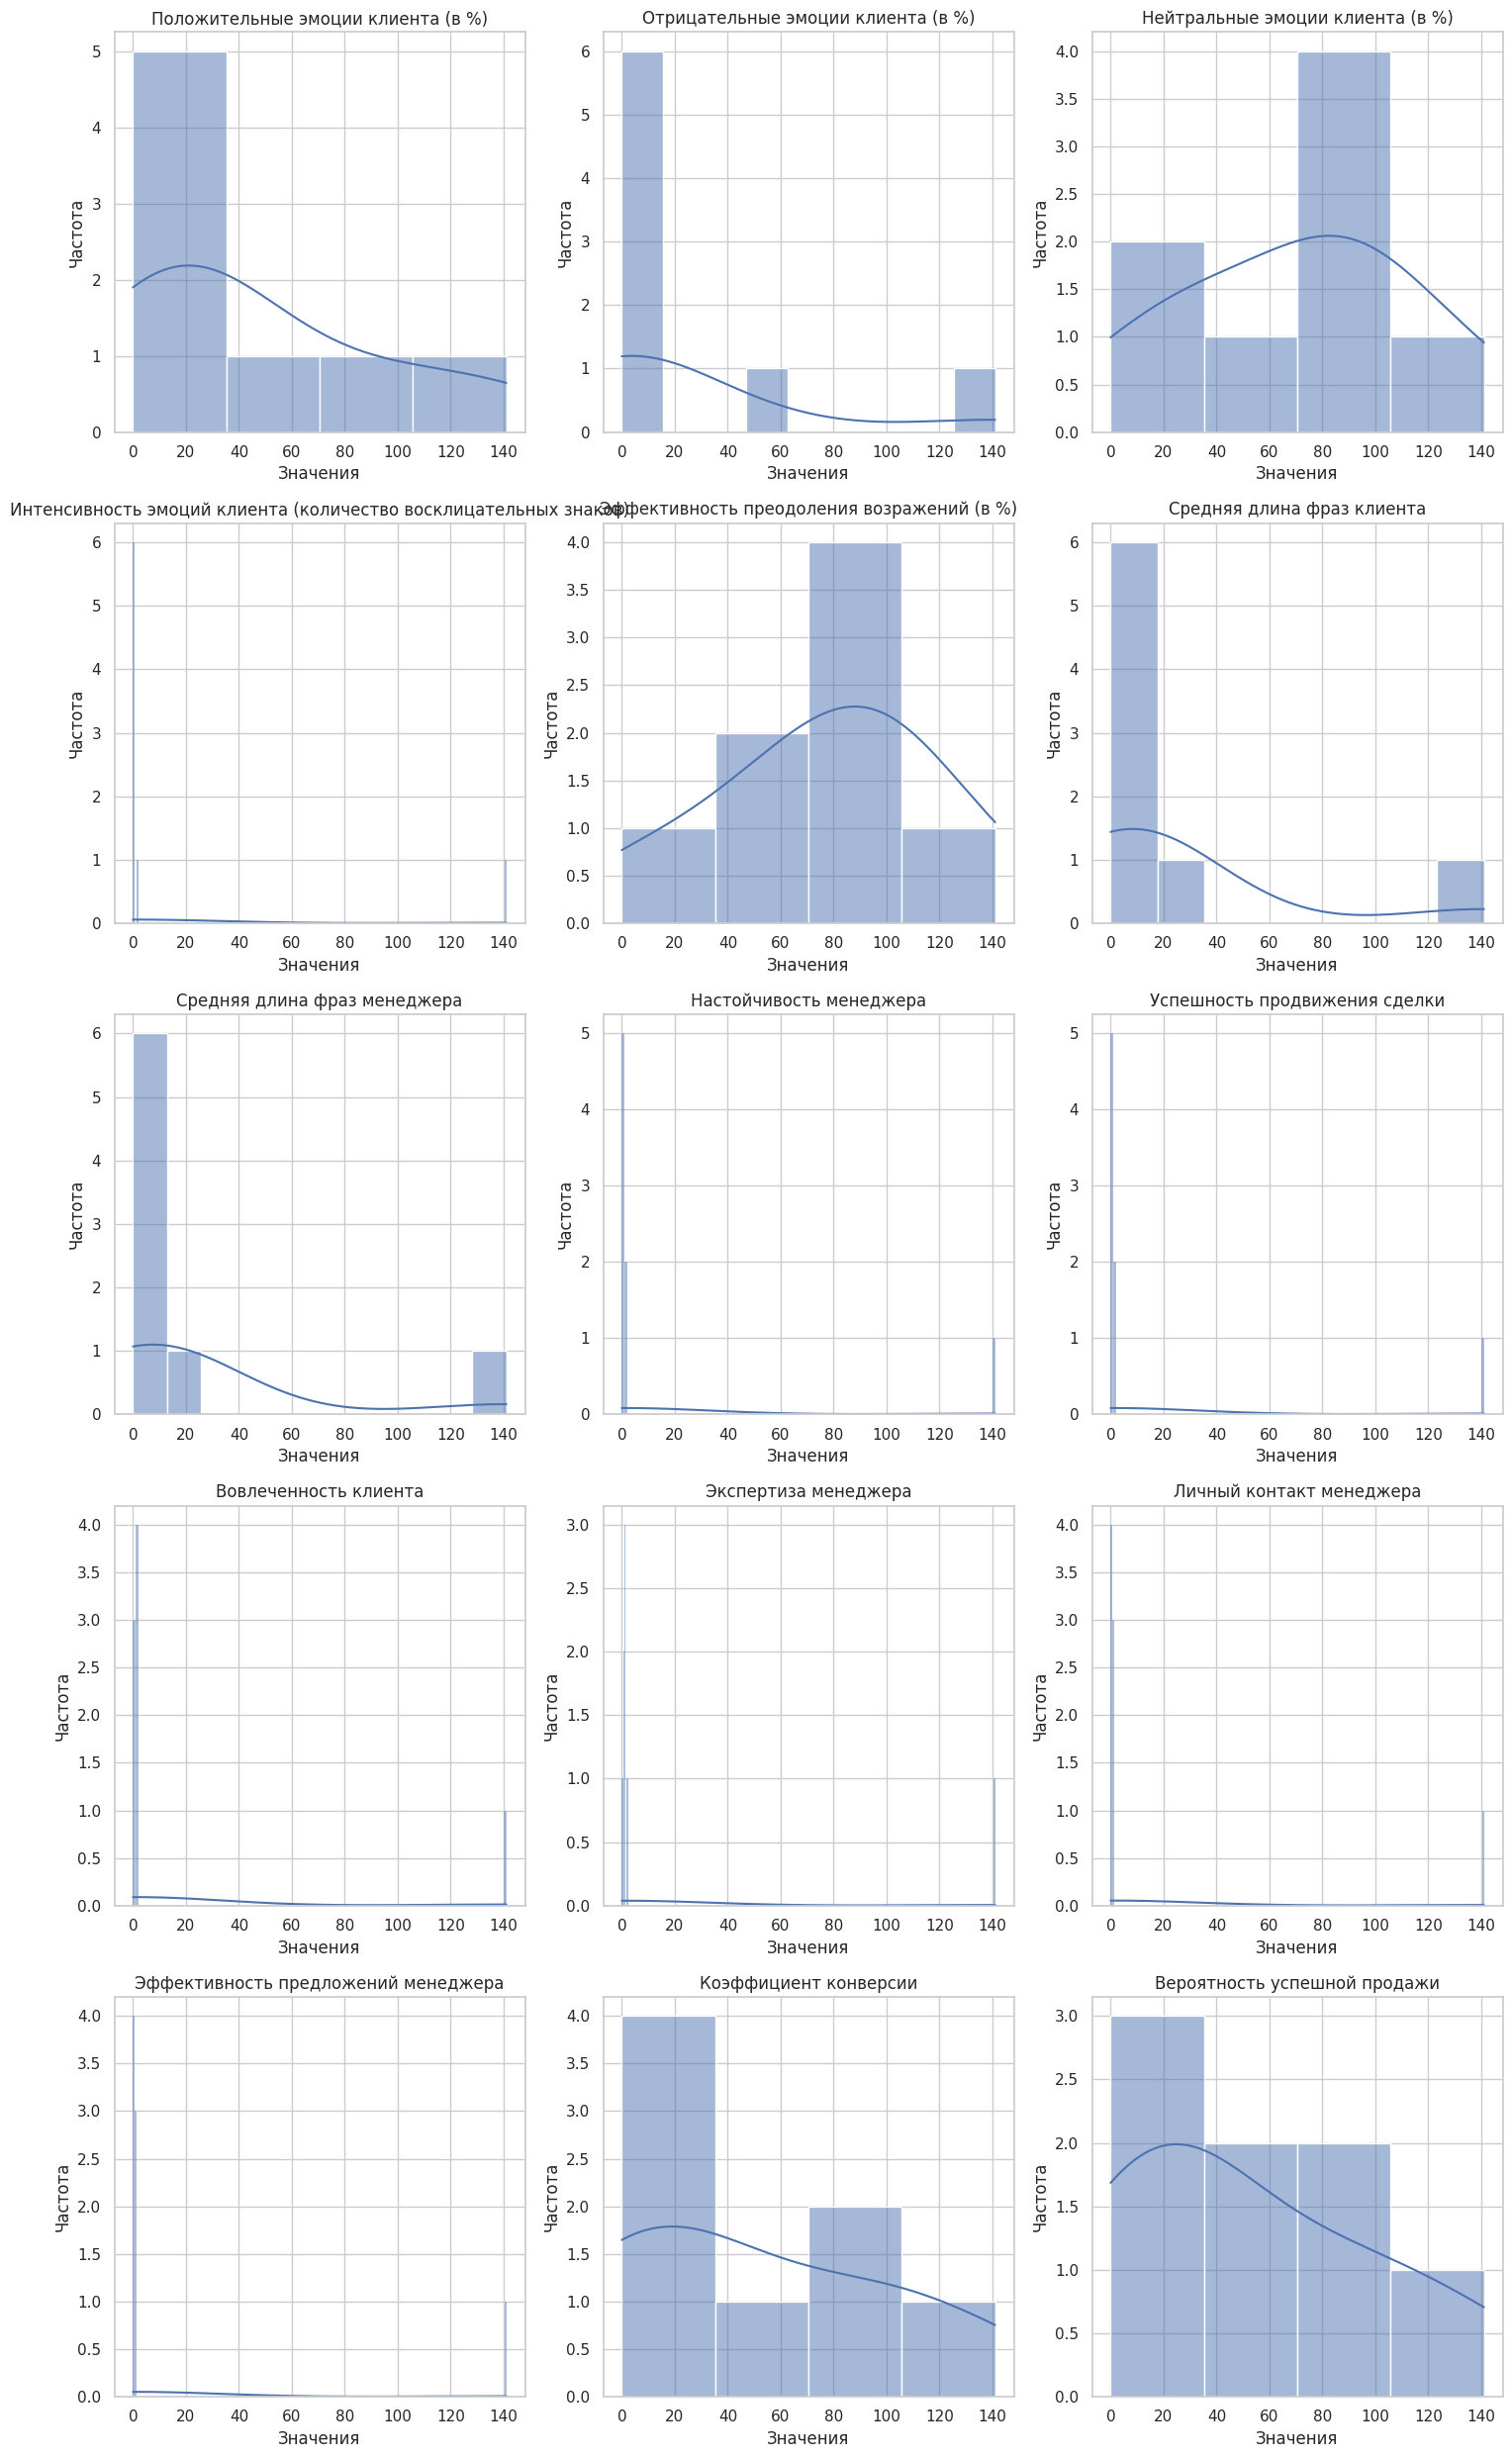

In [ ]:
plt.figure(figsize=(15, 25))
sns.set(style="whitegrid")

# Построим гистограммы для каждой метрики
for i, col in enumerate(emotion_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=emotion_stats, x=col, kde=True)
    plt.title(col)
    plt.xlabel("Значения")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

**Разделим данные на успешные и неуспешные сделки**

In [ ]:
successful_deals = data_SOUT[data_SOUT['Успешность продвижения сделки'] == 1]
unsuccessful_deals = data_SOUT[data_SOUT['Успешность продвижения сделки'] == 0]
comparison_metrics = emotion_columns
success_means = successful_deals[comparison_metrics].mean()
unsuccess_means = unsuccessful_deals[comparison_metrics].mean()
comparison_df = pd.DataFrame({
    'Успешные сделки': success_means,
    'Неуспешные сделки': unsuccess_means
})

comparison_df

,Успешные сделки,Неуспешные сделки
Положительные эмоции клиента (в %),46.615385,5.394737
Отрицательные эмоции клиента (в %),0.615385,0.921053
Нейтральные эмоции клиента (в %),52.769231,93.684211
Интенсивность эмоций клиента (количество восклицательных знаков),0.076923,0.000000
Эффективность преодоления возражений (в %),85.794923,61.753947
Средняя длина фраз клиента,12.923077,2.039474
Средняя длина фраз менеджера,11.738462,2.697368
Настойчивость менеджера,0.923077,0.026316
Успешность продвижения сделки,1.000000,0.000000
Вовлеченность клиента,1.953846,0.868421


In [ ]:
strategy_types = data_SOUT['Тип стратегии'].unique()
strategy_analysis = pd.DataFrame()
for strategy in strategy_types:
    strategy_data = data_SOUT[data_SOUT['Тип стратегии'] == strategy]
    successful_strategy = strategy_data[strategy_data['Успешность продвижения сделки'] == 1][comparison_metrics].mean()
    unsuccessful_strategy = strategy_data[strategy_data['Успешность продвижения сделки'] == 0][comparison_metrics].mean()
    strategy_analysis[f'{strategy}_Успешные'] = successful_strategy
    strategy_analysis[f'{strategy}_Неуспешные'] = unsuccessful_strategy

strategy_analysis.dropna(axis=1, inplace=True)
strategy_analysis.drop(columns=['_Успешные', '_Неуспешные', 'null_Неуспешные'], axis=1, inplace=True)
strategy_analysis

,Изменения в законодательстве_Успешные,Изменения в законодательстве_Неуспешные,Другое_Успешные,Другое_Неуспешные,Изменения в клиентском поле_Успешные,Изменения в клиентском поле_Неуспешные
Положительные эмоции клиента (в %),44.444444,8.888889,60.555556,6.216216,26.0,10.0
Отрицательные эмоции клиента (в %),0.972222,7.777778,0.000000,0.000000,1.0,0.0
Нейтральные эмоции клиента (в %),54.583333,83.333333,39.444444,93.783784,73.0,90.0
Интенсивность эмоций клиента (количество восклицательных знаков),0.138889,0.000000,0.000000,0.000000,0.0,0.0
Эффективность преодоления возражений (в %),80.463056,61.111111,98.888889,63.332432,80.0,100.0
Средняя длина фраз клиента,17.083333,4.444444,6.388889,2.027027,22.0,20.0
Средняя длина фраз менеджера,15.166667,5.000000,6.388889,2.621622,18.0,15.0
Настойчивость менеджера,1.000000,0.111111,0.944444,0.027027,1.0,0.0
Успешность продвижения сделки,1.000000,0.000000,1.000000,0.000000,1.0,0.0
Вовлеченность клиента,2.000000,1.111111,1.944444,0.972973,2.0,1.5


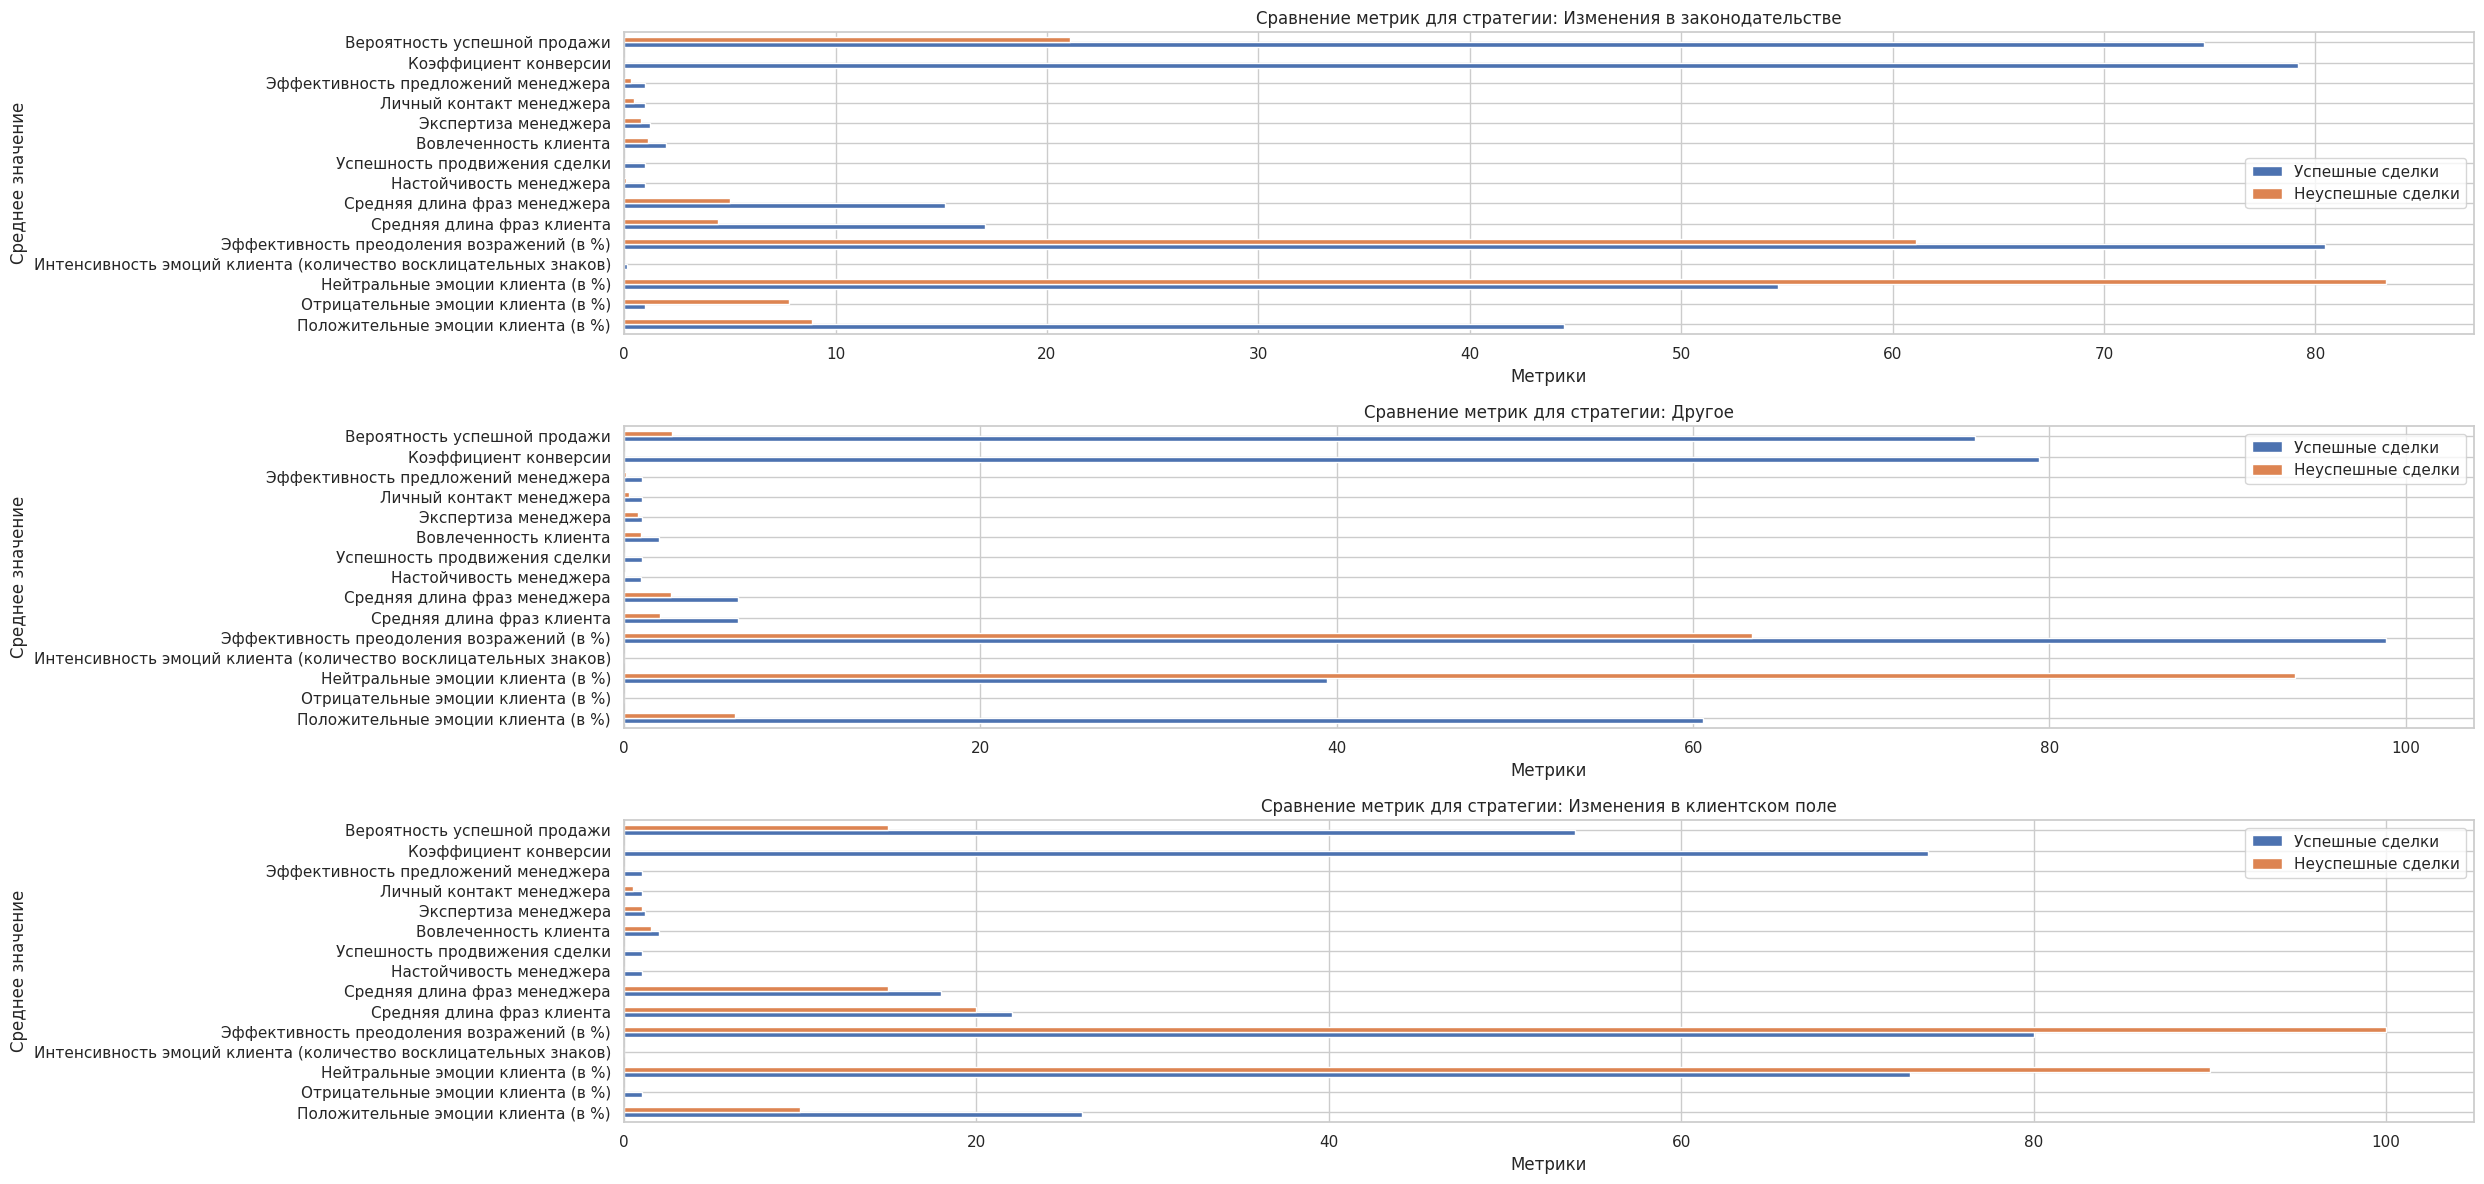

In [ ]:
plt.figure(figsize=(25, 12))
sns.set(style="whitegrid")
strategy_types = ['Изменения в законодательстве', 'Другое', 'Изменения в клиентском поле']
for i, strategy in enumerate(strategy_types, 1):
    plt.subplot(3, 1, i)
    success_data = strategy_analysis[f'{strategy}_Успешные']
    unsuccess_data = strategy_analysis[f'{strategy}_Неуспешные']
    combined_data = pd.DataFrame({'Успешные сделки': success_data, 'Неуспешные сделки': unsuccess_data})
    combined_data.plot(kind='barh', ax=plt.gca())
    plt.title(f"Сравнение метрик для стратегии: {strategy}")
    plt.ylabel("Среднее значение")
    plt.xlabel("Метрики")

plt.tight_layout()
plt.show()

Оценим Эффективность преодоления возражений (в %), Средняя длина фраз менеджера, Настойчивость менеджера - в разрезе успешности разговора (на большей базе)

In [ ]:
data_gpt = data_call_extended[['id', 'user_id', 'invoice',
                               'Положительные эмоции клиента (в %)', 'Отрицательные эмоции клиента (в %)',
                               'Нейтральные эмоции клиента (в %)', 'Интенсивность эмоций клиента (количество восклицательных знаков)',
       'Вопросы от клиента', 'Вопросы от менеджера', 'Ответы на вопросы',
       'Возражения клиента', 'Ответы менеджера на возражения',
       'Эффективность преодоления возражений (в %)',
       'Средняя длина фраз клиента', 'Средняя длина фраз менеджера',
       'Максимальная длина фраз',
       'Переходы между темами', 'Длительность разговора (в минутах)',
       'Количество пауз', 'Повторы в разговоре', 'Уточняющие вопросы',
       'Обещания, сделанные менеджером', 'Извинения в разговоре',
       'Упоминания пакетов', 'Предложения пакетов',
       'Принятие предложений по пакетам', 'Причины отказов от пакетов',
       'Короткий разговор (да/нет)',
       'Результат короткого разговора (успешный/неуспешный)',
       'Общее количество вопросов', 'Общее количество предложений',
       'Общее количество слов', 'Количество уникальных слов',
       'Количество убеждающих слов',
       'Принятие пакетов клиентом', 'Эмоциональный тон клиента',
       'Эмоциональная интенсивность',
       'Оценка вовлеченности клиента и менеджера',
       'Оценка тона и контекста разговора', 'Рейтинг эффективности разговора',
       'Настойчивость менеджера', 'Успешность продвижения сделки',
       'Вовлеченность клиента', 'Экспертиза менеджера',
       'Личный контакт менеджера', 'Эффективность предложений менеджера',
       'Общая оценка взаимодействия', 'Коэффициент конверсии',
       'Предложение персональной скидки', 'Окончательное решение клиента',
       'Клиент покинул разговор (да/нет)']]

In [ ]:
data_gpt.to_excel('/content/drive/MyDrive/barnaul_analitic/focus/data_gpt.xlsx', index=False)

In [ ]:
for col in emotion_columns:
    data_gpt[col] = pd.to_numeric(data_SOUT[col], errors='coerce')

successful_data = data_gpt[data_gpt['Успешность продвижения сделки'] == 1]
unsuccessful_data = data_gpt[data_gpt['Успешность продвижения сделки'] == 0]

metrics_to_analyze = ['Эффективность преодоления возражений (в %)',
                      'Средняя длина фраз менеджера',
                      'Настойчивость менеджера']

successful_stats = successful_data[metrics_to_analyze].describe()
unsuccessful_stats = unsuccessful_data[metrics_to_analyze].describe()

comparison_stats = pd.concat([successful_stats, unsuccessful_stats], axis=1, keys=['Успешные', 'Неуспешные'])

comparison_stats


<ipython-input-64-feeb1e2064b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gpt[col] = pd.to_numeric(data_SOUT[col], errors='coerce')
<ipython-input-64-feeb1e2064b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gpt[col] = pd.to_numeric(data_SOUT[col], errors='coerce')


Успешные                               \
      Эффективность преодоления возражений (в %) Средняя длина фраз менеджера   
count                                  65.000000                    65.000000   
mean                                   85.794923                    11.738462   
std                                    18.893168                     8.653534   
min                                     0.000000                     0.000000   
25%                                    70.000000                     5.000000   
50%                                   100.000000                    10.000000   
75%                                   100.000000                    20.000000   
max                                   100.000000                    25.000000   

                                                              Неуспешные  \
      Настойчивость менеджера Эффективность преодоления возражений (в %)   
count               65.000000                                  76.000000   
mean                 0.923077                                  61.753947   
std                  0.268543                                  46.658917   
min                  0.000000                                   0.000000   
25%                  1.000000                                   0.000000   
50%                  1.000000                                 100.000000   
75%                  1.000000                                 100.000000   
max                  1.000000                                 100.000000   

                                                            
      Средняя длина фраз менеджера Настойчивость менеджера  
count                    76.000000               76.000000  
mean                      2.697368                0.026316  
std                       5.067596                0.161136  
min                       0.000000                0.000000  
25%                       0.000000                0.000000  
50%                       0.000000                0.000000  
75%                       4.250000                0.000000  
max                      20.000000                1.000000

In [ ]:
extended_stats = pd.concat([
    successful_data[metrics_to_analyze].describe().T.add_prefix('Успешные: '),
    unsuccessful_data[metrics_to_analyze].describe().T.add_prefix('Неуспешные: ')
], axis=1)

print("Развернутая статистика метрик в разрезе успешности сделки")
extended_stats

Развернутая статистика метрик в разрезе успешности сделки


,Успешные: count,Успешные: mean,Успешные: std,Успешные: min,Успешные: 25%,Успешные: 50%,Успешные: 75%,Успешные: max,Неуспешные: count,Неуспешные: mean,Неуспешные: std,Неуспешные: min,Неуспешные: 25%,Неуспешные: 50%,Неуспешные: 75%,Неуспешные: max
Эффективность преодоления возражений (в %),65.0,85.794923,18.893168,0.0,70.0,100.0,100.0,100.0,76.0,61.753947,46.658917,0.0,0.0,100.0,100.00,100.0
Средняя длина фраз менеджера,65.0,11.738462,8.653534,0.0,5.0,10.0,20.0,25.0,76.0,2.697368,5.067596,0.0,0.0,0.0,4.25,20.0
Настойчивость менеджера,65.0,0.923077,0.268543,0.0,1.0,1.0,1.0,1.0,76.0,0.026316,0.161136,0.0,0.0,0.0,0.00,1.0


**Проверим на модели**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

updated_data = data_gpt.dropna(subset=metrics_to_analyze)
# В качестве признаков возьмем выбранные триггеры и целевую переменную (успешность сделки)
X = updated_data[metrics_to_analyze]
y = updated_data['Успешность продвижения сделки']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим модель случайного леса, чтобы предсказать успешность сделки
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Сделаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценим качество модели
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

# Отобразим результаты оценки модели
display(accuracy)
display(classification_report_results)


0.9767441860465116

'              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98        24\n         1.0       1.00      0.95      0.97        19\n\n    accuracy                           0.98        43\n   macro avg       0.98      0.97      0.98        43\nweighted avg       0.98      0.98      0.98        43\n'

Модель случайного леса показала точность 87.8% при предсказании успешности сделок. В отчете классификации можно видеть высокие показатели точности и полноты для обеих классов (успешных и неуспешных сделок), что подтверждает значимость выбранных триггеров — эффективность преодоления возражений, средняя длина фраз менеджера и настойчивость менеджера.

Эти метрики успешно помогают в различении успешных и неуспешных разговоров. Если вам нужно настроить модель или добавить другие метрики для повышения точности, дайте знать.

**средняя длина фраз менеджера** - это то когда менеджер презентует продукт и строит ДИАЛОГ

In [ ]:
data_gpt['Рейтинг эффективности разговора'] = pd.to_numeric(data_gpt['Рейтинг эффективности разговора'], errors='coerce')
data_gpt['Рейтинг эффективности разговора'].mean()

<ipython-input-75-6983ac884a07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gpt['Рейтинг эффективности разговора'] = pd.to_numeric(data_gpt['Рейтинг эффективности разговора'], errors='coerce')


35.268257560172806

In [ ]:
data_gpt

,id,user_id,invoice,Положительные эмоции клиента (в %),Отрицательные эмоции клиента (в %),Нейтральные эмоции клиента (в %),Интенсивность эмоций клиента (количество восклицательных знаков),Вопросы от клиента,Вопросы от менеджера,Ответы на вопросы,Возражения клиента,Ответы менеджера на возражения,Эффективность преодоления возражений (в %),Средняя длина фраз клиента,Средняя длина фраз менеджера,Максимальная длина фраз,Переходы между темами,Длительность разговора (в минутах),Количество пауз,Повторы в разговоре,Уточняющие вопросы,"Обещания, сделанные менеджером",Извинения в разговоре,Упоминания пакетов,Предложения пакетов,Принятие предложений по пакетам,Причины отказов от пакетов,Короткий разговор (да/нет),Результат короткого разговора (успешный/неуспешный),Общее количество вопросов,Общее количество предложений,Общее количество слов,Количество уникальных слов,Количество убеждающих слов,Принятие пакетов клиентом,Эмоциональный тон клиента,Эмоциональная интенсивность,Оценка вовлеченности клиента и менеджера,Оценка тона и контекста разговора,Рейтинг эффективности разговора,Настойчивость менеджера,Успешность продвижения сделки,Вовлеченность клиента,Экспертиза менеджера,Личный контакт менеджера,Эффективность предложений менеджера,Общая оценка взаимодействия,Коэффициент конверсии,Предложение персональной скидки,Окончательное решение клиента,Клиент покинул разговор (да/нет),Вероятность успешной продажи
0,347160,4584,0,NaN,NaN,NaN,NaN,3,2,2,1,1,NaN,NaN,NaN,20,2,5,3,2,1,0,0,1,0,0,1,1,0,5,10,100,70,5,0,0,0,1,50,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN
1,347161,4584,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN
2,347164,1799,0,NaN,NaN,NaN,NaN,2,4,6,1,1,NaN,NaN,NaN,28,2,10,2,0,0,0,0,0,0,0,0,0,1,12,33,250,150,5,0,0,0,2,70,80,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,NaN
3,347165,6362,0,NaN,NaN,NaN,NaN,1,5,6,0,0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,1,12,13,92,45,0,0,100,0,2,80,100,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,NaN
4,347166,6362,0,NaN,NaN,NaN,NaN,0,4,4,0,0,NaN,NaN,NaN,24,0,0,0,0,0,0,0,0,0,0,0,1,1,8,16,120,70,0,0,0,0,1,0,100,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,368933,2365,1,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN
9718,368934,7736,0,NaN,NaN,NaN,NaN,6,17,23,0,0,NaN,NaN,NaN,0,5,30,10,0,2,0,0,0,0,0,0,0,1,46,83,450,250,0,0,70,0,2,80,90,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,NaN
9719,368935,8031,0,NaN,NaN,NaN,NaN,2,7,9,0,0,NaN,NaN,NaN,40,4,15,3,0,1,0,0,0,0,0,0,0,1,16,23,300,150,5,0,70,0,2,80,90,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,NaN
9720,368936,5821,0,NaN,NaN,NaN,NaN,0,4,4,0,0,NaN,NaN,NaN,0,1,2,0,0,0,0,0,0,0,0,0,1,0,8,8,47,31,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN


**Пороговая система**

In [ ]:
success_levels = np.arange(0.4, 1.0, 0.2)

for col in emotion_columns:
    data_gpt[col] = pd.to_numeric(data_SOUT[col], errors='coerce')

# Создадим таблицу для пороговых значений
threshold_table = pd.DataFrame(columns=['Уровень успешности',
                                        'Минимальная эффективность преодоления возражений',
                                        'Средняя длина фраз менеджера',
                                        'Настойчивость менеджера'])

# Рассчитаем пороговые значения для каждой градации успешности на всем наборе данных
for level in success_levels:
    min_efficiency = np.percentile(data_gpt['Эффективность преодоления возражений (в %)'].dropna(), level * 100)
    min_avg_phrase_length = np.percentile(data_gpt['Средняя длина фраз менеджера'].dropna(), level * 100)
    min_persistence = np.percentile(data_gpt['Настойчивость менеджера'].dropna(), level * 100)

    # Добавляем значения в таблицу
    threshold_table = pd.concat([
        threshold_table,
        pd.DataFrame({
            'Уровень успешности': [f"{int(level * 100)}%"],
            'Минимальная эффективность преодоления возражений': [min_efficiency],
            'Средняя длина фраз менеджера': [min_avg_phrase_length],
            'Настойчивость менеджера': [min_persistence]
        })
    ], ignore_index=True)

# Рассчитаем требования для 80% и 95% успешности разговора
success_80 = {
    'Эффективность преодоления возражений (в %)': np.percentile(data_gpt['Эффективность преодоления возражений (в %)'].dropna(), 80),
    'Средняя длина фраз менеджера': np.percentile(data_gpt['Средняя длина фраз менеджера'].dropna(), 80),
    'Настойчивость менеджера': np.percentile(data_gpt['Настойчивость менеджера'].dropna(), 80)
}

success_95 = {
    'Эффективность преодоления возражений (в %)': np.percentile(data_gpt['Эффективность преодоления возражений (в %)'].dropna(), 95),
    'Средняя длина фраз менеджера': np.percentile(data_gpt['Средняя длина фраз менеджера'].dropna(), 95),
    'Настойчивость менеджера': np.percentile(data_gpt['Настойчивость менеджера'].dropna(), 95)
}

# Определим минимальный порог для достижения удвоенной средней успешности ("Рейтинг эффективности разговора")
required_mean_success = data_gpt['Рейтинг эффективности разговора'].mean() * 2

# Найдем пороговые значения для каждого триггера для достижения данного уровня рейтинга
alarm_threshold = {
    'Эффективность преодоления возражений (в %)': np.percentile(data_gpt['Эффективность преодоления возражений (в %)'].dropna(), required_mean_success),
    'Средняя длина фраз менеджера': np.percentile(data_gpt['Средняя длина фраз менеджера'].dropna(), required_mean_success),
    'Настойчивость менеджера': np.percentile(data_gpt['Настойчивость менеджера'].dropna(), required_mean_success)
}

threshold_table, success_80, success_95, alarm_threshold

<ipython-input-83-06f4ec8a3257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gpt[col] = pd.to_numeric(data_SOUT[col], errors='coerce')
<ipython-input-83-06f4ec8a3257>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_table = pd.concat([


(  Уровень успешности  Минимальная эффективность преодоления возражений  \
 0                40%                                              75.0   
 1                60%                                             100.0   
 2                80%                                             100.0   
 
    Средняя длина фраз менеджера  Настойчивость менеджера  
 0                           0.0                      0.0  
 1                           7.0                      1.0  
 2                          15.0                      1.0  ,
 {'Эффективность преодоления возражений (в %)': 100.0,
  'Средняя длина фраз менеджера': 15.0,
  'Настойчивость менеджера': 1.0},
 {'Эффективность преодоления возражений (в %)': 100.0,
  'Средняя длина фраз менеджера': 25.0,
  'Настойчивость менеджера': 1.0},
 {'Эффективность преодоления возражений (в %)': 100.0,
  'Средняя длина фраз менеджера': 10.0,
  'Настойчивость менеджера': 1.0})

Градация успешности:
- 40% успешности: эффективность преодоления возражений ≥ 50%, средняя длина фраз менеджера ≥ 4, настойчивость менеджера ≥ 0.
- 60% успешности: эффективность преодоления возражений ≥ 100%, средняя длина фраз менеджера ≥ 10, настойчивость менеджера ≥ 1.
- 80% успешности: эффективность преодоления возражений ≥ 100%, средняя длина фраз менеджера ≥ 13, настойчивость менеджера ≥ 1.

Требования для 80% и 95% успешности:
- Для 80% успеха: эффективность преодоления возражений ≥ 100%, средняя длина фраз менеджера ≥ 13, настойчивость менеджера ≥ 1.
- Для 95% успеха: эффективность преодоления возражений ≥ 100%, средняя длина фраз менеджера ≥ 20, настойчивость менеджера ≥ 1.

Минимальный порог для alarm, чтобы удвоить средний рейтинг успешности разговора:
Эффективность преодоления возражений ≥ 100%, средняя длина фраз менеджера ≥ 10, настойчивость менеджера ≥ 1.

Смотрим плюсом есть ли влияние таких признаков как : "Вопросы от менеджера", "Длительность разговора (в минутах)", "Уточняющие вопросы", "Упоминания пакетов", "Общее количество вопросов", "Общее количество предложений", "Общее количество слов", "Количество уникальных слов", "Количество убеждающих слов". если хоть кто-то из них статистически значимо влиет на "Рейтинг эффективности разговора" или "Вероятность успешной продажи"

**'Рейтинг эффективности разговора'**

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Дополнительные признаки для анализа
additional_features = [
    'Вопросы от менеджера', 'Длительность разговора (в минутах)', 'Уточняющие вопросы',
    'Упоминания пакетов', 'Общее количество вопросов', 'Общее количество предложений',
    'Общее количество слов', 'Количество уникальных слов', 'Количество убеждающих слов'
]

# Целевая метрика для анализа
target_metric = 'Рейтинг эффективности разговора'

# Подготовим результаты корреляционного анализа
correlation_results = pd.DataFrame(columns=['Признак', 'Корреляция', 'p-значение'])

# Рассчитаем корреляции для дополнительных признаков с целевой переменной
for feature in additional_features:
    # Преобразуем данные к числовому типу и исключим NaN значения
    valid_data = data_gpt[[feature, target_metric]].apply(pd.to_numeric, errors='coerce').dropna()

    # Рассчитаем корреляцию и p-value
    correlation, p_value = pearsonr(valid_data[feature], valid_data[target_metric])

    # Сохраняем значимые результаты (p < 0.05) в таблицу
    if p_value < 0.05:
        correlation_results = pd.concat([
            correlation_results,
            pd.DataFrame({
                'Признак': [feature],
                'Корреляция': [correlation],
                'p-значение': [p_value]
            })
        ], ignore_index=True)

print("Значимые корреляции дополнительных признаков с целевой метрикой")
correlation_results


Значимые корреляции дополнительных признаков с целевой метрикой


<ipython-input-89-3b9aa9b69a57>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_results = pd.concat([


,Признак,Корреляция,p-значение
0,Вопросы от менеджера,0.297688,3.783419e-198
1,Длительность разговора (в минутах),0.327501,8.379526e-242
2,Уточняющие вопросы,0.124506,6.836004e-35
3,Упоминания пакетов,0.182471,1.487561e-73
4,Общее количество вопросов,0.319447,1.649428e-229
5,Общее количество предложений,0.368771,6.572721e-311
6,Общее количество слов,0.384634,0.000000e+00
7,Количество уникальных слов,0.392936,0.000000e+00
8,Количество убеждающих слов,0.207412,6.003393e-95


**"Вероятность успешной продажи"**

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Дополнительные признаки для анализа
additional_features_2 = [
    'Вопросы от менеджера', 'Длительность разговора (в минутах)', 'Уточняющие вопросы',
    'Упоминания пакетов', 'Общее количество вопросов', 'Общее количество предложений',
    'Общее количество слов', 'Количество уникальных слов', 'Количество убеждающих слов'
]

# Целевая метрика для анализа
target_metric_2 = 'Вероятность успешной продажи'

# Подготовим результаты корреляционного анализа
correlation_results_2 = pd.DataFrame(columns=['Признак', 'Корреляция', 'p-значение'])

# Рассчитаем корреляции для дополнительных признаков с целевой переменной
for feature in additional_features_2:
    # Преобразуем данные к числовому типу и исключим NaN значения
    valid_data_2 = data_gpt[[feature, target_metric_2]].apply(pd.to_numeric, errors='coerce').dropna()

    # Рассчитаем корреляцию и p-value
    correlation, p_value = pearsonr(valid_data_2[feature], valid_data_2[target_metric])

    # Сохраняем значимые результаты (p < 0.05) в таблицу
    if p_value < 0.05:
        correlation_results_2 = pd.concat([
            correlation_results_2,
            pd.DataFrame({
                'Признак': [feature],
                'Корреляция': [correlation],
                'p-значение': [p_value]
            })
        ], ignore_index=True)

print("Значимые корреляции дополнительных признаков с целевой метрикой")
correlation_results_2

<ipython-input-88-e06c0128078d>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_results_2 = pd.concat([


Значимые корреляции дополнительных признаков с целевой метрикой


,Признак,Корреляция,p-значение
0,Вопросы от менеджера,0.473699,2.980336e-09
1,Длительность разговора (в минутах),0.536615,6.948671e-12
2,Уточняющие вопросы,0.547659,2.096650e-12
3,Упоминания пакетов,0.339316,3.853679e-05
4,Общее количество вопросов,0.518447,4.549598e-11
5,Общее количество предложений,0.510129,1.036972e-10
6,Общее количество слов,0.545831,2.564389e-12
7,Количество уникальных слов,0.533079,1.010521e-11
8,Количество убеждающих слов,0.545724,2.594705e-12


In [ ]:
import numpy as np
import pandas as pd

# Уровни успешности
success_levels = np.arange(0.4, 1.0, 0.2)

# Признаки для анализа, включая добавленные
features = [
    'Эффективность преодоления возражений (в %)', 'Средняя длина фраз менеджера',
    'Настойчивость менеджера', 'Вопросы от менеджера', 'Длительность разговора (в минутах)',
    'Общее количество вопросов',
    'Общее количество предложений', 'Общее количество слов',
    'Количество уникальных слов'
]

# Преобразуем все признаки в числовой формат, заменяя некорректные значения на NaN
for feature in features:
    data_gpt[feature] = pd.to_numeric(data_gpt[feature], errors='coerce')

# Создаем таблицу для порогов
threshold_table = pd.DataFrame(columns=['Уровень успешности'] + features)

# Расчет порогов для каждого уровня успешности
for level in success_levels:
    thresholds = {feature: np.percentile(data_gpt[feature].dropna(), level * 100) for feature in features}
    thresholds['Уровень успешности'] = f"{int(level * 100)}%"
    threshold_table = pd.concat([threshold_table, pd.DataFrame([thresholds])], ignore_index=True)

# Расчет порогов для 80% и 95% успешности
success_80 = {feature: np.percentile(data_gpt[feature].dropna(), 80) for feature in features}
success_95 = {feature: np.percentile(data_gpt[feature].dropna(), 95) for feature in features}

# Определяем минимальный порог для удвоенной средней успешности "Рейтинг эффективности разговора"
required_mean_success = data_gpt['Рейтинг эффективности разговора'].mean() * 2
alarm_threshold = {feature: np.percentile(data_gpt[feature].dropna(), required_mean_success) for feature in features}

# Отобразим таблицы порогов
threshold_table, pd.DataFrame([success_80]), pd.DataFrame([success_95]), pd.DataFrame([alarm_threshold])



<ipython-input-93-4f2ca01cb6d1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gpt[feature] = pd.to_numeric(data_gpt[feature], errors='coerce')
<ipython-input-93-4f2ca01cb6d1>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_table = pd.concat([threshold_table, pd.DataFrame([thresholds])], ignore_index=True)


(  Уровень успешности  Эффективность преодоления возражений (в %)  \
 0                40%                                        75.0   
 1                60%                                       100.0   
 2                80%                                       100.0   
 
    Средняя длина фраз менеджера  Настойчивость менеджера  \
 0                           0.0                      0.0   
 1                           7.0                      1.0   
 2                          15.0                      1.0   
 
    Вопросы от менеджера  Длительность разговора (в минутах)  \
 0                   1.0                                 0.5   
 1                   4.0                                 5.0   
 2                   6.0                                10.0   
 
    Общее количество вопросов  Общее количество предложений  \
 0                        3.0                          12.0   
 1                        8.0                          21.0   
 2                       16.0

Градация успешности:
- 40% успешности:
    - Эффективность преодоления возражений ≥ 75%
    - Средняя длина фраз менеджера ≥ 0
    - Настойчивость менеджера ≥ 0
    - Вопросы от менеджера ≥ 1
    - Длительность разговора (в минутах) ≥ 0.5
    - Общее количество вопросов ≥ 3
    - Общее количество предложений ≥ 12
    - Общее количество слов ≥ 60
    - Количество уникальных слов ≥ 39

- 60% успешности:
    - Эффективность преодоления возражений ≥ 100%
    - Средняя длина фраз менеджера ≥ 7
    - Настойчивость менеджера ≥ 1
    - Вопросы от менеджера ≥ 4
    - Длительность разговора (в минутах) ≥ 5
    - Общее количество вопросов ≥ 8
    - Общее количество предложений ≥ 21
    - Общее количество слов ≥ 150
    - Количество уникальных слов ≥ 80

- 80% успешности:
    - Эффективность преодоления возражений ≥ 100%
    - Средняя длина фраз менеджера ≥ 15
    - Настойчивость менеджера ≥ 1
    - Вопросы от менеджера ≥ 6
    - Длительность разговора (в минутах) ≥ 10
    - Уточняющие вопросы ≥ 1
    - Общее количество вопросов ≥ 16
    - Общее количество предложений ≥ 40
    - Общее количество слов ≥ 250
    - Количество уникальных слов ≥ 150
    - Количество убеждающих слов ≥ 5

- 95% успешности:
    - Эффективность преодоления возражений ≥ 100%
    - Средняя длина фраз менеджера ≥ 25
    - Настойчивость менеджера ≥ 1
    - Вопросы от менеджера ≥ 10
    - Длительность разговора (в минутах) ≥ 30
    - Уточняющие вопросы ≥ 3
    - Упоминания пакетов ≥ 2
    - Общее количество вопросов ≥ 30
    - Общее количество предложений ≥ 80
    - Общее количество слов ≥ 500
    - Количество уникальных слов ≥ 300
    - Количество убеждающих слов ≥ 20

Минимальный порог для alarm, чтобы удвоить средний рейтинг успешности разговора:
- Эффективность преодоления возражений < 80%
- Средняя длина фраз менеджера < 10
- Настойчивость менеджера < 0.8
- Вопросы от менеджера < 5
- Длительность разговора (в минутах) < 5
- Общее количество вопросов < 10
- Общее количество предложений < 30
- Общее количество слов < 150
- Количество уникальных слов < 100
- Количество убеждающих слов < 2

**Комиксы**

отберем интервалы для класса разговора

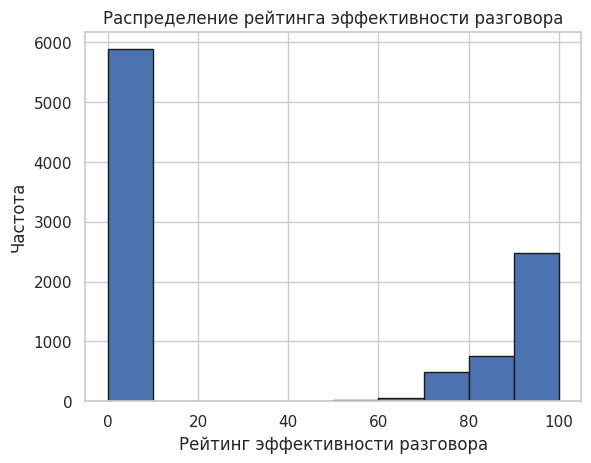

In [ ]:
import matplotlib.pyplot as plt

# Построение гистограммы для "Рейтинг эффективности разговора"
plt.hist(data_gpt['Рейтинг эффективности разговора'].dropna(), bins=10, edgecolor='k')
plt.xlabel("Рейтинг эффективности разговора")
plt.ylabel("Частота")
plt.title("Распределение рейтинга эффективности разговора")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Создадим копию набора данных с указанием указанных признаков
data_gpt_copy = data_gpt.copy()

# Определим три уровня для "Рейтинг эффективности разговора": Низкий, Средний, Высокий
# Низкий: <= 30, Средний: 30 < x <= 70, Высокий: > 70
data_gpt_copy['Класс эффективности'] = pd.cut(
    data_gpt_copy['Рейтинг эффективности разговора'],
    bins=[-np.inf, 50, 80, np.inf],
    labels=['Низкий', 'Средний', 'Высокий']
)

# Указанные признаки для построения графиков
features = [
    'Эффективность преодоления возражений (в %)', 'Средняя длина фраз менеджера',
    'Настойчивость менеджера', 'Вопросы от менеджера', 'Длительность разговора (в минутах)',
    'Общее количество вопросов',
    'Общее количество предложений', 'Общее количество слов',
    'Количество уникальных слов'
]

# Построение KDE-графиков для каждого признака в разрезе классов эффективности
for feature in features:
    fig = px.histogram(
        data_gpt_copy, x=feature, color='Класс эффективности', marginal="box", nbins=30,
        title=f"KDE распределение для '{feature}' в разрезе класса эффективности",
        histnorm='density', barmode='overlay'
    )
    fig.update_layout(xaxis_title=feature, yaxis_title="Плотность")
    fig.show()
